In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#borsa dataseti
dataset_train=pd.read_csv("Stock_Price_Train.csv")

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
train = dataset_train.loc[:, ["Open"]].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [5]:
#feature scaling-->normalizasyon
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

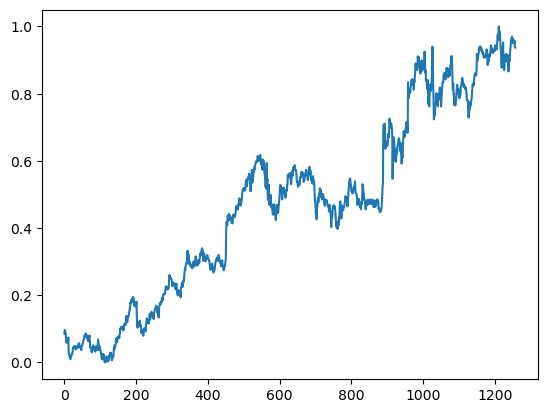

In [6]:
plt.plot(train_scaled)
plt.show()

In [7]:
#creating a data structure with 50 timesteps and 1 output
# RNN için veri hazırlama (zaman serisi pencereleri oluşturma)
X_train = []  # Giriş verileri (özellikler) için boş bir liste
y_train = []  # Çıkış verileri (hedef) için boş bir liste
timesteps = 50  # Her veri noktası için kullanılacak zaman adımı sayısı
# Eğitim verilerini zaman pencereleri halinde ayırma
for i in range(timesteps, 1258):
    X_train.append(train_scaled[i-timesteps:i, 0])  # Geçmiş 50 zaman adımını ekliyoruz
    y_train.append(train_scaled[i, 0])  # Gelecek adımın hedef değeri

# Listeleri NumPy dizilerine dönüştürüyoruz
X_train, y_train = np.array(X_train), np.array(y_train)    

In [8]:
# Reshaping
# Giriş verilerini yeniden şekillendiriyoruz, böylece RNN modeliyle uyumlu hale geliyor (örnek sayısı, zaman adımları, özellik sayısı)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.03675869],
        [0.04486941],
        [0.05065481]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.04486941],
        [0.05065481],
        [0.05214302]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.05065481],
        [0.05214302],
        [0.05612397]],

       ...,

       [[0.9313937 ],
        [0.94636878],
        [0.96569685],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.94636878],
        [0.96569685],
        [0.97510976],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.96569685],
        [0.97510976],
        [0.95966962],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [9]:
y_train

array([0.05214302, 0.05612397, 0.05818885, ..., 0.95725128, 0.93796041,
       0.93688146])

In [10]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# Initialising the RNN
# RNN modelini başlatıyoruz
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
# Çıkış katmanını ekliyoruz (tek bir nöron, çünkü tek bir değer tahmin ediyoruz)
regressor.add(Dense(units = 1))

# Compiling the RNN
# Modeli derliyoruz (optimizer = 'adam', loss = 'mean_squared_error')
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
# Modeli eğitim verisi üzerinde eğitiyoruz
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 0.4011
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2157
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1666
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1156
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0925
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0717
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0624
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0523
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0409
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0421
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0351
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0268
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0251
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - lo

In [11]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [12]:
real_stock_price = dataset_test.loc[:, ["Open"]].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [13]:
# Getting the predicted stock price of 2017
# Eğitim ve test verilerini birleştiriyoruz (test verisini tahmin edebilmek için)
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
# Modelin tahmin yapabilmesi için test verisini hazırlıyoruz
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values.reshape(-1, 1)
inputs = scaler.transform(inputs)  # Verileri normalleştiriyoruz (0-1 aralığında) # min max scaler


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


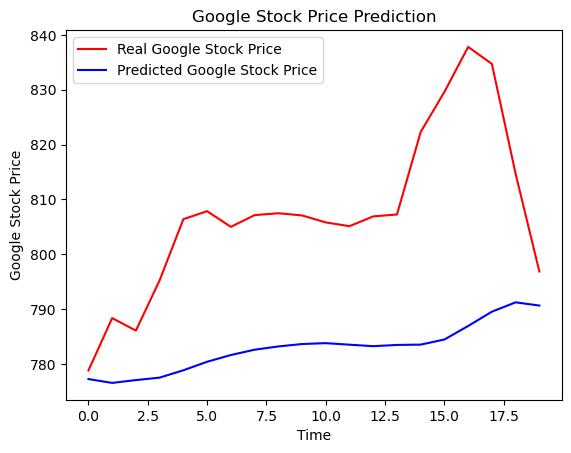

In [14]:
# Test verilerini zaman pencerelerine ayırıyoruz
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i, 0])

# Test verisini NumPy dizisine dönüştürüyoruz ve yeniden şekillendiriyoruz
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Model kullanarak tahmin yapıyoruz
predicted_stock_price = regressor.predict(X_test)

# Tahmin edilen hisse senedi fiyatlarını normal formata geri çeviriyoruz (inverse_transform)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
# epoch = 250 daha güzel sonuç veriyor.

In [15]:
#LSTM
import numpy
import pandas as pd 
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [16]:
#havalanındaki yocu sayısı
data = pd.read_csv('international-airline-passengers.csv',skipfooter=5)
data.head()


,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


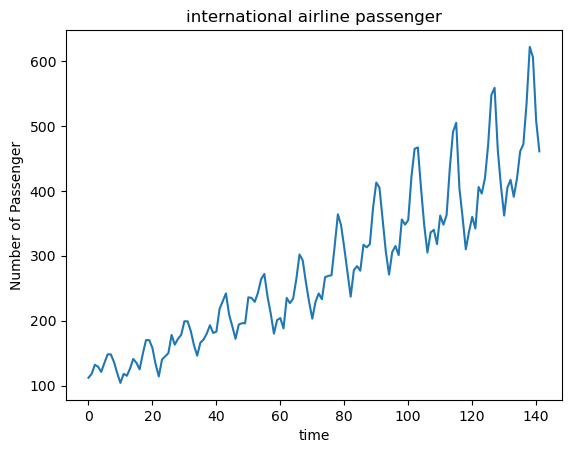

In [17]:
dataset = data.iloc[:,1].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Number of Passenger")
plt.title("international airline passenger")
plt.show()

In [18]:
dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")
dataset.shape

(142, 1)

In [19]:
# scaling 
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [20]:
# Veriyi eğitim ve test setlerine ayırmak için eğitim setinin boyutunu belirliyoruz
train_size = int(len(dataset) * 0.50)

# Test setinin boyutunu belirlemek için toplam veri seti boyutundan eğitim seti boyutunu çıkarıyoruz
test_size = len(dataset) - train_size

# Veriyi, belirlenen boyutlara göre eğitim ve test setlerine ayırıyoruz
train = dataset[0:train_size, :]  # İlk kısımdan eğitim seti
test = dataset[train_size:len(dataset), :]  # Geri kalan kısımdan test seti

# Eğitim ve test setlerinin boyutlarını ekrana yazdırıyoruz
print("train size: {}, test size: {} ".format(len(train), len(test)))


train size: 71, test size: 71 


In [21]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = numpy.array(dataX)
trainY = numpy.array(dataY)  

In [22]:
dataX = []  # Test setindeki giriş verilerini (özellikler) depolamak için boş bir liste oluşturuyoruz
dataY = []  # Test setindeki hedef verileri (etiketler) depolamak için boş bir liste oluşturuyoruz

# Test verisi üzerinde döngü oluşturuyoruz
for i in range(len(test) - time_stemp - 1):
    # Zaman adımına göre belirli bir pencereyi seçiyoruz ve bunu 'a' değişkenine atıyoruz
    a = test[i:(i + time_stemp), 0]
    
    # Seçilen pencereyi giriş verilerine ekliyoruz
    dataX.append(a)
    
    # Pencerenin hemen sonrasındaki değeri hedef veri olarak ekliyoruz
    dataY.append(test[i + time_stemp, 0])

# Listeleri NumPy dizilerine dönüştürüyoruz
testX = numpy.array(dataX)  # Giriş verileri (test seti)
testY = numpy.array(dataY)  # Hedef verileri (test seti)


In [23]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [24]:
model = Sequential()
model.add(LSTM(10, input_shape=(1, time_stemp))) # 10 lstm neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0250
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031    
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0036
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0023    
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017    
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031    
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0028
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025    
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022

In [25]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Train Score: 17.82 RMSE
Test Score: 39.19 RMSE


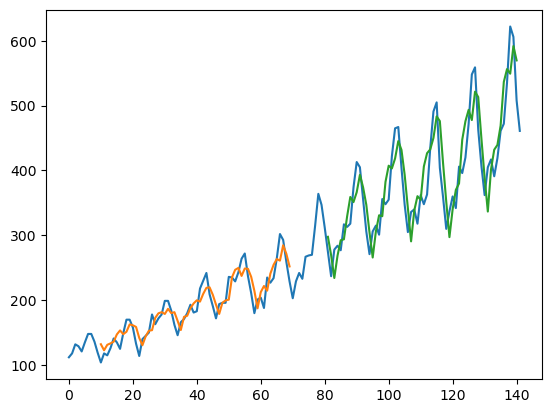

In [26]:
# shifting train
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()